In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
import cv2
import os
import math

In [2]:
# Define a class to receive the characteristics of each line detection
class Line:
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None  

In [17]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def HLSscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

In [22]:
def camera_calibration(objpoints, imgpoints, gray):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    

def distortion_correction():
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    
def Perspective_Transformation(img, src):
    #defining the offset for the bird eye view camera
    offset = 
    dst = 
    M = cv2.getPerspectiveTransform()
    
    warped = cv2.warpPerspective(img, M, img_size, flags = cv2.INTER_LINEAR)

    return warped

SyntaxError: invalid syntax (<ipython-input-22-d000cb59b669>, line 11)

This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)


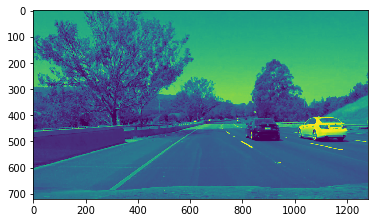

In [21]:
def __main__():
    #reading Movies
    
    #reading images
    for img_name in os.listdir("test_images/"):
        img = mpimg.imread("test_images/"+img_name)
        print('This image is:', type(img), 'with dimensions:', img.shape)
        
        gray = grayscale(img)
        plt.imshow(gray)
        hls = HLSscale(img)
        hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        H = hls[:,:,0]
        L = hls[:,:,1]
        S = hls[:,:,2]
        plt.imshow(L)
        #Camera Calibration

        #Distortion Correction

        #Perspective Transform

        #Color & Gradient Threshold

        #Detect Lane Lines

        #Determine Lane Curvatures

    #plt.imshow(gray)

__main__()

In [ ]:
##Visualization ##
# Create an image to draw the lines on
warp_zero = np.zeros_like(warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
plt.imshow(result)

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\calib3d\src\calibinit.cpp:505: error: (-211:One of arguments' values is out of range) Both width and height of the pattern should have bigger than 2 in function 'cv::findChessboardCorners'


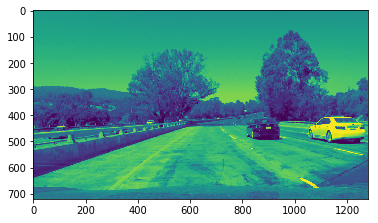

In [29]:
#testing the best warp approach
img = mpimg.imread("test_images/test1.jpg")
gray = grayscale(img)
nx = 6
ny = 7
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
plt.imshow(gray)
undist = cv2.undistort(img, nx, ny)

#src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])

In [27]:
corners

In [28]:
ret

False